In [69]:
pip install mtcnn

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [72]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = '/content/drive/My Drive/Face Recognition with MTCNN/test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}
{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


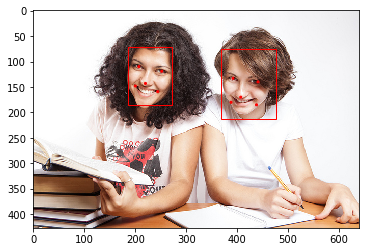

In [73]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

filename = '/content/drive/My Drive/Face Recognition with MTCNN/test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

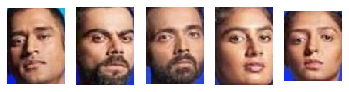

In [74]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

filename = '/content/drive/My Drive/Face Recognition with MTCNN/test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)